In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin='dataset_url', untar=True)
data_dir = pathlib.Path(data_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


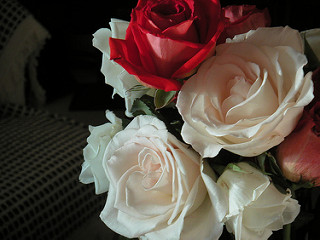

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

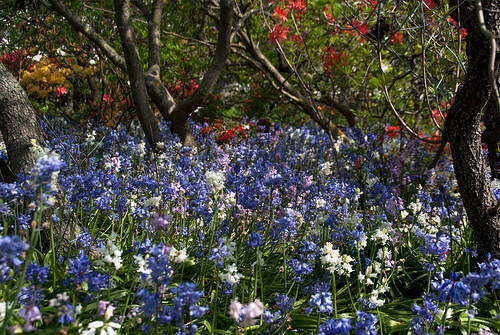

In [8]:
roses = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(roses[1]))

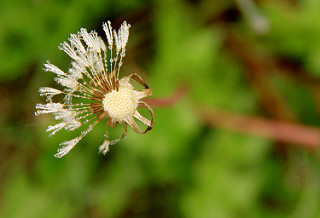

In [9]:
roses = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(roses[1]))

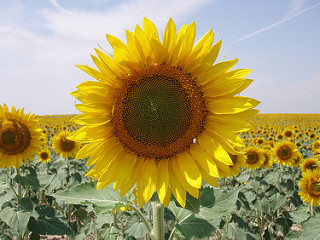

In [10]:
roses = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(roses[1]))

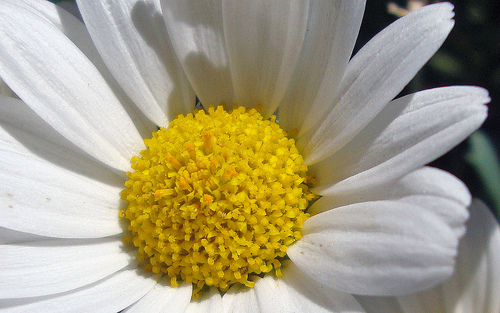

In [11]:
roses = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(roses[1]))

In [12]:
batch_size = 32
img_height = 180
img_width = 180

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.91525054


In [19]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [22]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 39s 407ms/step - loss: 1.3291 - accuracy: 0.4343 - val_loss: 1.1580 - val_accuracy: 0.5082
Epoch 2/10
92/92 [==============================] - 25s 267ms/step - loss: 1.0491 - accuracy: 0.5811 - val_loss: 0.9125 - val_accuracy: 0.6322
Epoch 3/10
92/92 [==============================] - 23s 248ms/step - loss: 0.8946 - accuracy: 0.6482 - val_loss: 0.8612 - val_accuracy: 0.6553
Epoch 4/10
92/92 [==============================] - 23s 248ms/step - loss: 0.7442 - accuracy: 0.7153 - val_loss: 0.8411 - val_accuracy: 0.6608
Epoch 5/10
92/92 [==============================] - 23s 247ms/step - loss: 0.5770 - accuracy: 0.7847 - val_loss: 0.8879 - val_accuracy: 0.6621
Epoch 6/10
92/92 [==============================] - 22s 244ms/step - loss: 0.4665 - accuracy: 0.8338 - val_loss: 0.8407 - val_accuracy: 0.6948
Epoch 7/10
92/92 [==============================] - 23s 247ms/step - loss: 0.3260 - accuracy: 0.8883 - val_loss: 0.9238 - val_accuracy: 0.7057

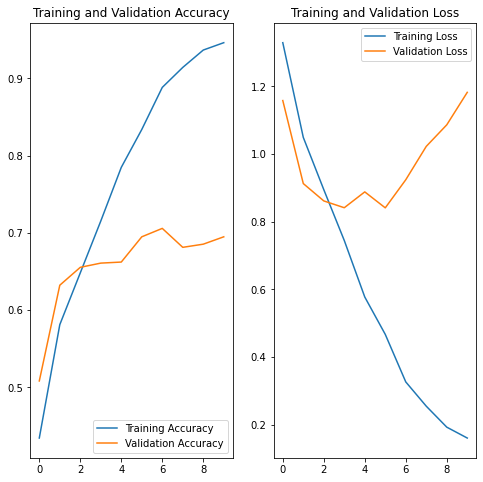

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
model.evaluate(
  val_ds,
  verbose=1
)

23/23 [==============================] - 1s 51ms/step - loss: 1.1822 - accuracy: 0.6948


[1.1822336912155151, 0.6948229074478149]

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

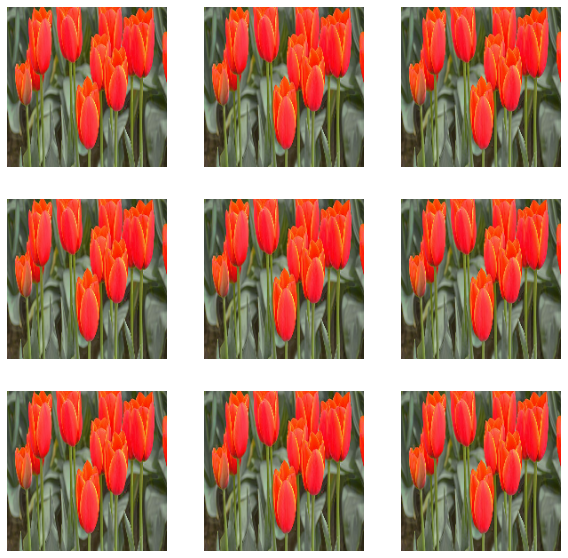

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [27]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 27s 283ms/step - loss: 1.3969 - accuracy: 0.3968 - val_loss: 1.0932 - val_accuracy: 0.5668
Epoch 2/15
92/92 [==============================] - 25s 277ms/step - loss: 1.0623 - accuracy: 0.5644 - val_loss: 1.1466 - val_accuracy: 0.5313
Epoch 3/15
92/92 [==============================] - 26s 280ms/step - loss: 0.9442 - accuracy: 0.6332 - val_loss: 0.9497 - val_accuracy: 0.6390
Epoch 4/15
92/92 [==============================] - 26s 280ms/step - loss: 0.8807 - accuracy: 0.6638 - val_loss: 0.8721 - val_accuracy: 0.6567
Epoch 5/15
92/92 [==============================] - 26s 279ms/step - loss: 0.8403 - accuracy: 0.6778 - val_loss: 0.8161 - val_accuracy: 0.6649
Epoch 6/15
92/92 [==============================] - 25s 276ms/step - loss: 0.7855 - accuracy: 0.6941 - val_loss: 0.8123 - val_accuracy: 0.6921
Epoch 7/15
92/92 [==============================] - 25s 277ms/step - loss: 0.7712 - accuracy: 0.7030 - val_loss: 0.8180 - val_accuracy: 0.6689

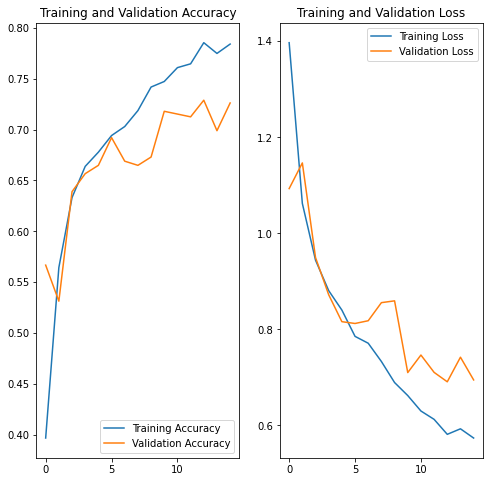

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()